## J-Graphs

**Justified Graphs** are commonly used in Space Syntax methodology to represent the minimum number of topological steps that it requires to go from one specific point to all other points in the network.

This is usually an useful excercise to comnpare difference in the _depth_ (max number of steps) of different locations of a spatial structure.

Commonly, one looks at the depth difference between all entrances to a building and/or closeby metro stations to a plaza. 

The main idea representede beautifly by these escercises is that '**things looks different depending from where you are**'

____

#### Setup 
Let's load neccesary libraries and core functions before we look at some examples

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import count
import pandas as pd

In [2]:
def jgraph_from_node(G, origin):
  """
  Draws the Justified graph (J-graph) from the selected origin.
  Internally it calculates the shortest topological distance from every node \
  to the defined origin

  RETURNS
  ---
  A visual representation of the JGraph
  """
  nodes = G.nodes()
  topo_steps = [nx.shortest_path_length(G, source=origin, target= n) for n in nodes]
  d = [(n,{'steps':s}) for n,s in zip(nodes,topo_steps)]
  
  topo_steps = [nx.shortest_path_length(G, source=origin, target= n) for n in nodes]

  d = [(n,{'steps':s}) for n,s in zip(nodes,topo_steps)]

  G = nx.Graph()
  G.add_edges_from(edges)
  G.add_nodes_from(d)

  pos = nx.multipartite_layout(G,subset_key='steps', align='horizontal',scale=1.75)
  plt.figure(figsize=(10,10))
  nx.draw(G ,pos=pos, 
          with_labels=True, 
          node_color='orange', node_size=800)

  print('Mean depth = '+ str(round(sum(topo_steps)/len(topo_steps),2)))
  print('Maximum topological steps = '+ str(max(topo_steps)))


def mean_depth_calcs(G,graph_output = False):
  #for loop to calculate all mean depths from all points
  mean_depths = []
  for n in nodes:
    topo_steps = [nx.shortest_path_length(G, source=n, target= no) for no in nodes]
    md = sum(topo_steps)/len(topo_steps)
    mean_depths.append(md)
  mean_depth = {n: md for n,md in zip(nodes,mean_depths)}

  if graph_output == True :
    nx.set_node_attributes(G,mean_depth,name='mean_depth')
    output = G
  else :
  output = pd.DataFrame.from_dict(mean_depth,orient='index', columns=['mean_depth'])

  return output


In [3]:
#Casa Rio Frio Salmona
edges = [('M','L'),('L','K'),('K','Q'),('O','Q'),('Q','P'),('N','Q'),
         ('Q','C'),('C','E'),('T','R'),('S','R'),('J','B'),('J','F'),
         ('B','R'),('B','C'),('B','A'),('R','D'),('C','D'),('C','D'),
         ('C','F'),('G','H'),('G','F'),('F','I'),('A','X'),('D','H'),
         ('D','X'),('H','X'),('I','X')]

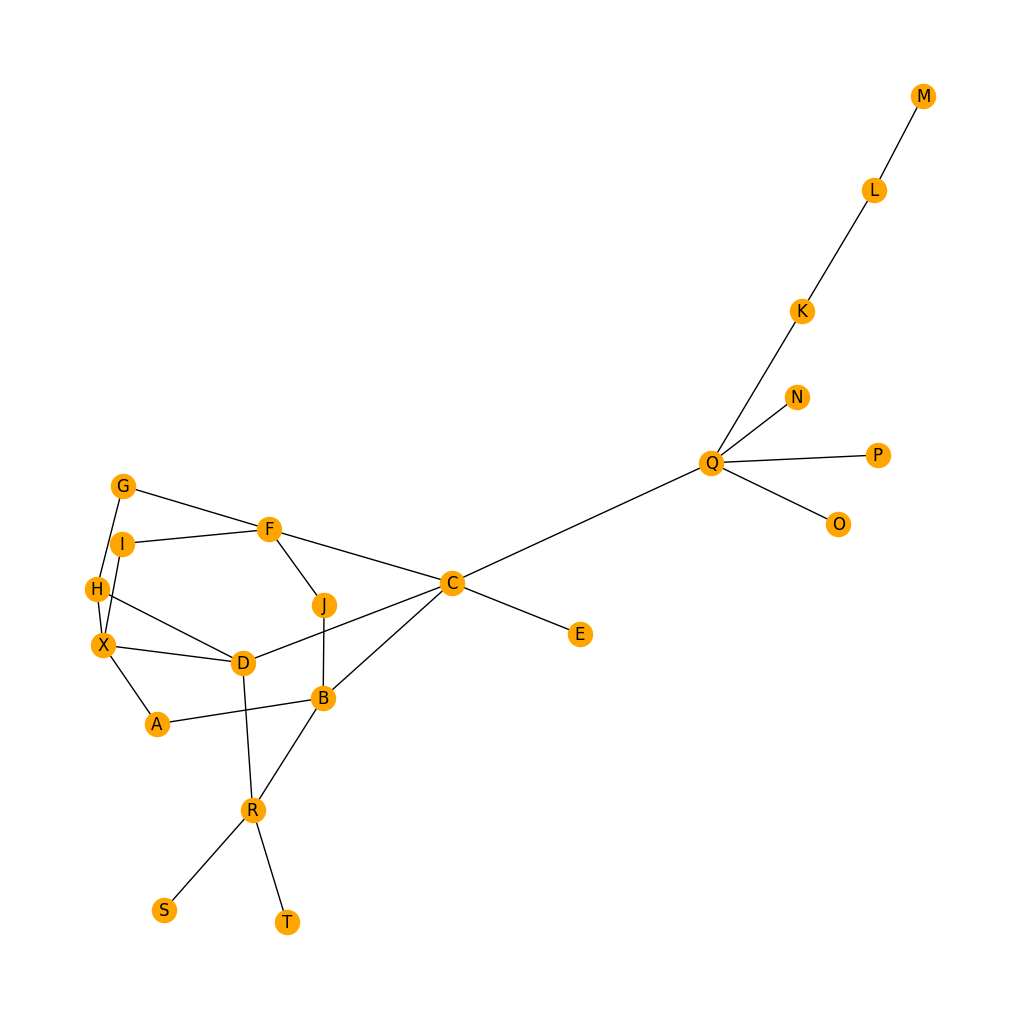

In [4]:
G = nx.Graph()
G.add_edges_from(edges)
#nodes = G.nodes()

plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True, node_color ='orange')

Mean depth = 1.9
Maximum topological steps = 4


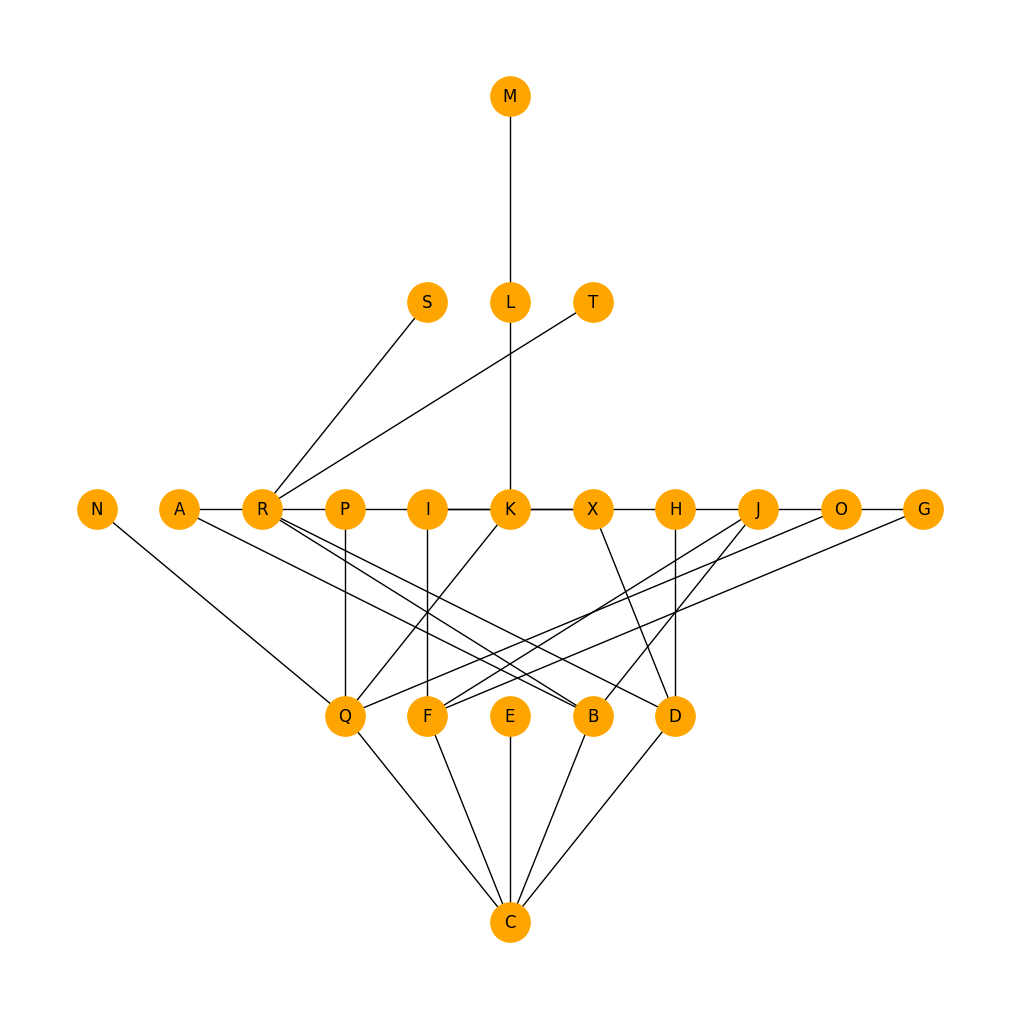

In [5]:

jgraph_from_node(G,'C')

Mean depth = 3.14
Maximum topological steps = 5


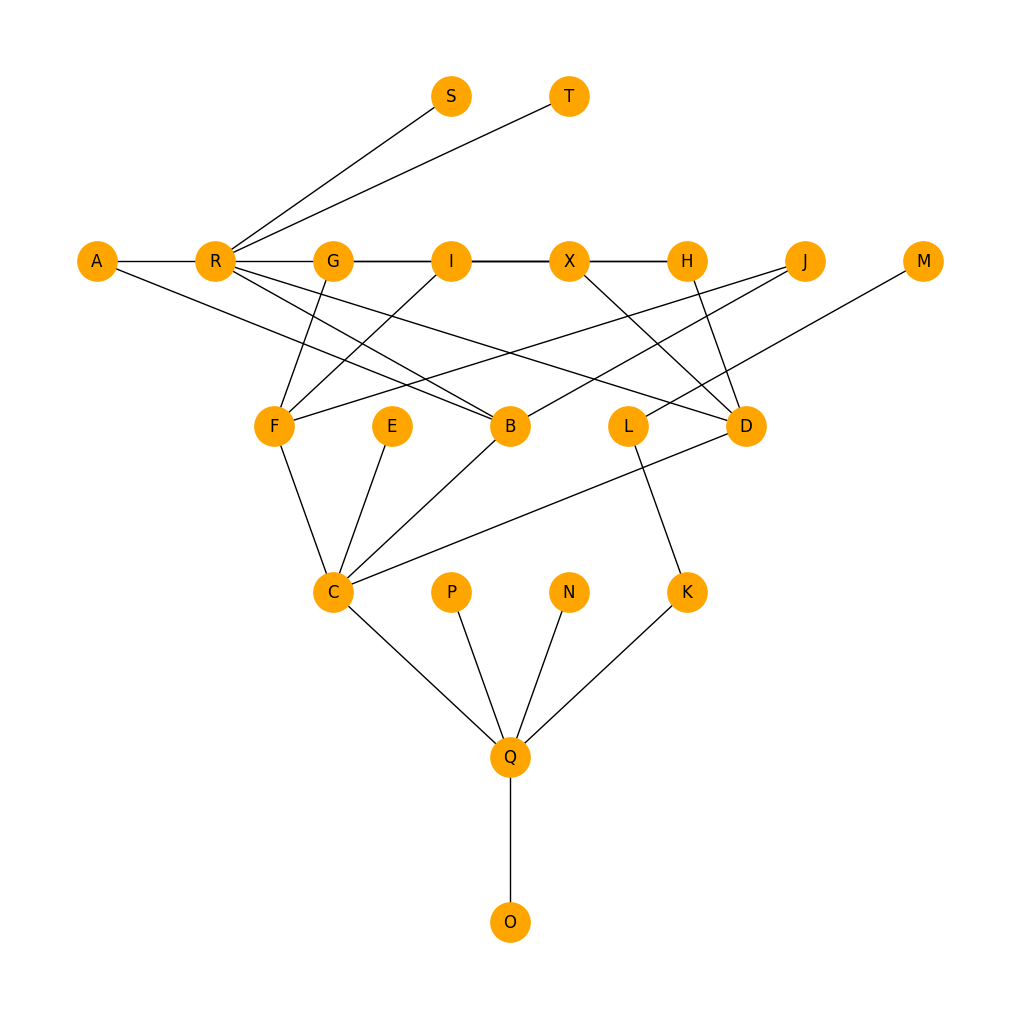

In [6]:
jgraph_from_node(G,'O')